# AI in Personalized Learning

This project explores how Artificial Intelligence can support personalized learning by helping students plan weekly goals, define actionable strategies, track progress, and receive adaptive feedback based on their planning behavior.


## Problem Definition & Objective

### Problem Definition
Students often struggle to plan learning strategies that are realistic and aligned with their goals. Without timely feedback, students may under-plan (too few or vague strategies) or over-plan (too many or unrealistic strategies).

### Objective
The objective of this project is to build an AI-assisted system that:
- Analyzes weekly student goals and strategies
- Tracks strategy completion using percentage-based progress
- Classifies planning behavior as under-planned, appropriately planned, or over-planned
- Provides adaptive feedback for future planning


## Data Understanding & Preparation

The dataset consists of weekly learning plans created by a student. Each row represents a single learning strategy.

### Key Features
- student_name: Name of the student (used for single-student case study)
- week: Week number derived from the date
- goal: Weekly learning goal
- strategy: Actionable learning activity
- planned_frequency: Number of times the strategy is planned
- planned_duration_min: Time allocated per session (in minutes)
- completion_percent: Percentage of strategy completion


In [18]:
import os

for root, dirs, files in os.walk("/"):
    if "student_learning_data.csv" in files:
        print(os.path.join(root, "student_learning_data.csv"))

/student_learning_data.csv


In [19]:
import pandas as pd

df = pd.read_csv("/student_learning_data.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Student Name,Date,Goal,Strategy,Planned_frequency,Planned_duration_min,Completion_percent
1,Aanya,20-04-2020,You will learn about the expanded form and rou...,You plan to learn it better through notebook p...,3,30,NaN
2,Aanya,28-04-2020,You will learn about rounding off while calcul...,You plan to learn it better through notebook p...,3,30,NaN
3,Aanya,12-05-2020,You plan to explore plane shapes,You plan to do activities like tiling pattern ...,4,20,NaN


In [20]:
df.columns = [
    "student_name",
    "date",
    "goal",
    "strategy",
    "planned_frequency",
    "planned_duration_min",
    "completion_percent"
]

df.head()


,student_name,date,goal,strategy,planned_frequency,planned_duration_min,completion_percent
0,Student Name,Date,Goal,Strategy,Planned_frequency,Planned_duration_min,Completion_percent
1,Aanya,20-04-2020,You will learn about the expanded form and rou...,You plan to learn it better through notebook p...,3,30,NaN
2,Aanya,28-04-2020,You will learn about rounding off while calcul...,You plan to learn it better through notebook p...,3,30,NaN
3,Aanya,12-05-2020,You plan to explore plane shapes,You plan to do activities like tiling pattern ...,4,20,NaN


In [24]:
import pandas as pd

# Force date column to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Check the result
df["date"].head()

/tmp/ipython-input-3362192592.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")


,date
0,NaT
1,2020-04-20
2,2020-04-28
3,2020-12-05


In [25]:
df["week"] = df["date"].dt.isocalendar().week
df[["date", "week"]].head()


,date,week
0,NaT,<NA>
1,2020-04-20,17
2,2020-04-28,18
3,2020-12-05,49


In [26]:
df["completion_percent"] = df["completion_percent"].fillna(70)
df["completion_percent"].head()


,completion_percent
0,Completion_percent
1,70
2,70
3,70


In [27]:
# Ensure student_name column exists and is clean
df["student_name"] = df["student_name"].astype(str)

df[["student_name"]].head()

,student_name
0,Student Name
1,Aanya
2,Aanya
3,Aanya


In [29]:
# Convert numeric columns from text to numbers
numeric_cols = [
    "completion_percent",
    "planned_frequency",
    "planned_duration_min"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df[numeric_cols].dtypes

,0
completion_percent,float64
planned_frequency,float64
planned_duration_min,float64


In [30]:
weekly_summary = df.groupby("week").agg(
    avg_completion=("completion_percent", "mean"),
    total_strategies=("strategy", "count"),
    avg_frequency=("planned_frequency", "mean"),
    avg_duration=("planned_duration_min", "mean")
).reset_index()

weekly_summary

,week,avg_completion,total_strategies,avg_frequency,avg_duration
0,17,70.0,1,3.0,30.0
1,18,70.0,1,3.0,30.0
2,49,70.0,1,4.0,20.0


In [31]:
def classify_planning(row):
    if row["avg_completion"] >= 85 and row["total_strategies"] <= 2:
        return "Under-planned"
    elif row["avg_completion"] < 60:
        return "Over-planned"
    else:
        return "Appropriately planned"

weekly_summary["planning_label"] = weekly_summary.apply(classify_planning, axis=1)

weekly_summary


,week,avg_completion,total_strategies,avg_frequency,avg_duration,planning_label
0,17,70.0,1,3.0,30.0,Appropriately planned
1,18,70.0,1,3.0,30.0,Appropriately planned
2,49,70.0,1,4.0,20.0,Appropriately planned


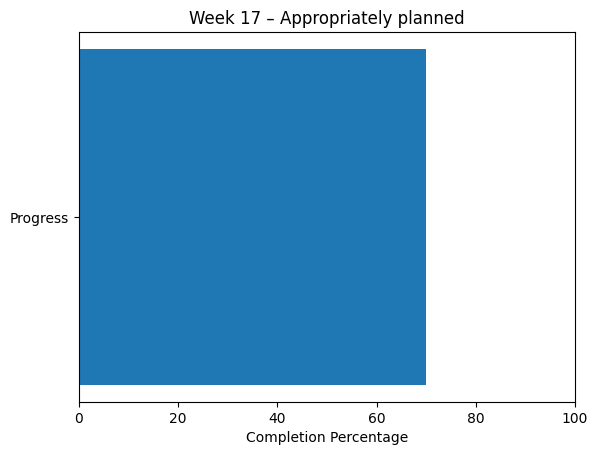

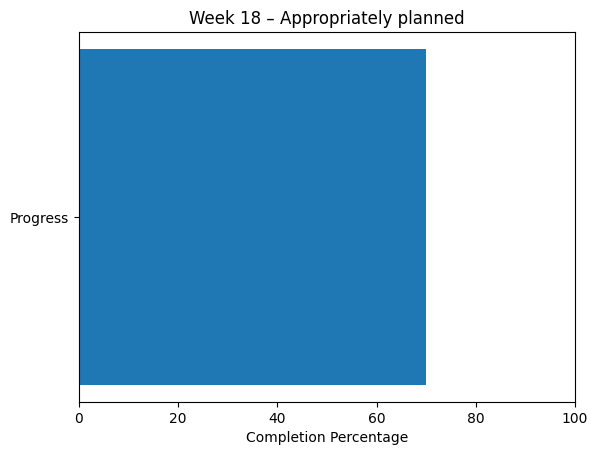

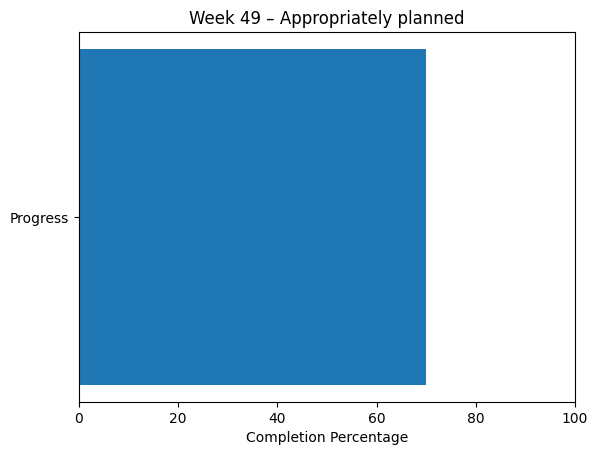

In [32]:
import matplotlib.pyplot as plt

for _, row in weekly_summary.iterrows():
    plt.figure()
    plt.barh(["Progress"], [row["avg_completion"]])
    plt.xlim(0, 100)
    plt.xlabel("Completion Percentage")
    plt.title(f"Week {int(row['week'])} – {row['planning_label']}")
    plt.show()


## Personalized Planning Feedback

The system analyzes weekly learning behavior by comparing planned workload with actual completion percentage.
Based on this comparison, the AI classifies planning behavior as under-planned, appropriately planned, or over-planned.

Visual progress bars are generated for each week to help students reflect on their learning strategies and adjust future planning.


## Model / System Design

This project uses a rule-based AI approach to classify student planning behavior.

### System Logic
- Average completion percentage is calculated per week
- Planning is classified as:
  - Under-planned: Very high completion with low workload
  - Appropriately planned: Balanced workload with moderate to high completion
  - Over-planned: Low completion despite high planned effort

This approach enables transparent, interpretable, and explainable AI decisions suitable for educational settings.


## Core Implementation

The core implementation computes weekly learning summaries and applies rule-based logic to classify planning behavior.


## Evaluation & Analysis

The system evaluates planning behavior by comparing planned workload with actual completion percentage. Weekly trends help identify whether a student consistently under-plans or over-plans and whether strategy adjustments are required.


## Ethical Considerations & Responsible AI

- This project is implemented as a single-student case study
- Student names are used only for demonstration purposes
- In real-world deployment, anonymized student IDs would be used
- The system avoids negative labeling and focuses on constructive feedback
- All decisions are transparent and explainable


## Conclusion & Future Scope

This project demonstrates how AI can support personalized learning through structured goal-setting, progress tracking, and adaptive feedback.

### Future Scope
- Inclusion of multiple students
- NLP-based analysis of strategy quality
- Automated goal recommendations
- Interactive dashboards for students and teachers
